In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install catboost

     |████████████████████████████████| 69.2 MB 4.8 kB/s 


In [4]:
df= pd.read_csv('total_cities.csv')

In [5]:
df.columns

Index(['city', 'location', 'type of house', 'Status of house', 'type of area',
       'resale', 'registration', 'bedrooms', 'bathrooms', 'area_sq.ft',
       'price'],
      dtype='object')

In [6]:
df

,city,location,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,mumbai,manpada,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,2600.0,4.000
1,mumbai,vinay nagar,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,981.0,0.900
2,mumbai,pokhran-2,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,NaN,1268.0,3.120
3,mumbai,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,503.5,0.980
4,mumbai,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,397.5,0.735
...,...,...,...,...,...,...,...,...,...,...,...
133326,hyderabad,nizampet,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1550.0,0.850
133327,hyderabad,prakash nagar,independent house,READY TO MOVE,plot area,yes,no,8.0,9.0,1215.0,0.985
133328,hyderabad,9th phase kphb,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1700.0,2.400
133329,hyderabad,manikonda,residential apartment,READY TO MOVE,carpet area,yes,no,2.0,2.0,1310.0,0.650


In [7]:
df.isnull().sum()

city                   0
location               0
type of house          0
Status of house        0
type of area           0
resale                 0
registration           0
bedrooms           19582
bathrooms          21417
area_sq.ft             0
price                  0
dtype: int64

In [8]:
df.loc[79505,'price'] = 935.0 * (10**-5)

In [9]:
df.loc[79505,'price']

0.00935

In [10]:
##In the presence of missing coordinates, the Euclidean distance is calculated by ignoring the missing values and scaling up the weight of the non-missing coordinates.

In [11]:
from sklearn.impute import KNNImputer

In [12]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [13]:
a = df[['bedrooms','bathrooms','area_sq.ft']]

In [14]:
a.head()

,bedrooms,bathrooms,area_sq.ft
0,4.0,4.0,2600.0
1,2.0,2.0,981.0
2,3.0,NaN,1268.0
3,2.0,2.0,503.5
4,1.0,1.0,397.5


In [15]:
imputer.fit(a)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [16]:
b = imputer.transform(a)

In [18]:
b = pd.DataFrame(b)

In [19]:
b.head()

,0,1,2
0,4.0,4.0,2600.0
1,2.0,2.0,981.0
2,3.0,2.6,1268.0
3,2.0,2.0,503.5
4,1.0,1.0,397.5


In [20]:
b[0] = b[0].round()

In [21]:
b[1] = b[1].round()

In [22]:
b

,0,1,2
0,4.0,4.0,2600.0
1,2.0,2.0,981.0
2,3.0,3.0,1268.0
3,2.0,2.0,503.5
4,1.0,1.0,397.5
...,...,...,...
133326,3.0,3.0,1550.0
133327,8.0,9.0,1215.0
133328,3.0,3.0,1700.0
133329,2.0,2.0,1310.0


In [23]:
df['bedrooms'] = b[0]

In [24]:
df['bathrooms'] = b[1]

In [25]:
df

,city,location,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,mumbai,manpada,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,2600.0,4.000
1,mumbai,vinay nagar,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,981.0,0.900
2,mumbai,pokhran-2,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,1268.0,3.120
3,mumbai,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,503.5,0.980
4,mumbai,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,397.5,0.735
...,...,...,...,...,...,...,...,...,...,...,...
133326,hyderabad,nizampet,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1550.0,0.850
133327,hyderabad,prakash nagar,independent house,READY TO MOVE,plot area,yes,no,8.0,9.0,1215.0,0.985
133328,hyderabad,9th phase kphb,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1700.0,2.400
133329,hyderabad,manikonda,residential apartment,READY TO MOVE,carpet area,yes,no,2.0,2.0,1310.0,0.650


In [26]:
df.isnull().sum()

city               0
location           0
type of house      0
Status of house    0
type of area       0
resale             0
registration       0
bedrooms           0
bathrooms          0
area_sq.ft         0
price              0
dtype: int64

In [27]:
#h_b = h_b.drop(h_b[h_b['area_sq.ft'] < 300].index)


In [28]:
df.shape

(133331, 11)

In [29]:
df.isnull().sum()

city               0
location           0
type of house      0
Status of house    0
type of area       0
resale             0
registration       0
bedrooms           0
bathrooms          0
area_sq.ft         0
price              0
dtype: int64

# IQR

In [30]:
#inter quantile range

In [31]:
df['area_sq.ft'].describe()

count    133331.000000
mean       1657.557185
std        1375.960038
min           1.000000
25%         870.000000
50%        1250.000000
75%        1980.000000
max       14854.000000
Name: area_sq.ft, dtype: float64

In [32]:
q1 = df['area_sq.ft'].quantile(0.25)

In [33]:
q3 = df['area_sq.ft'].quantile(0.75)

In [34]:
iqr = q3-q1

In [35]:
iqr

1110.0

In [36]:
lq = q1 - (1.5*iqr)

In [37]:
lq

-795.0

In [38]:
uq = q3 + (1.5*iqr)

In [39]:
uq

3645.0

# STANDARD DEVIATION

In [ ]:
m = df['area_sq.ft'].mean()

In [ ]:
m

8764.753572063793

In [ ]:
s = df['area_sq.ft'].std()

In [ ]:
upper_l = m + 3*s

In [ ]:
lower_r = m - 3*s

In [ ]:
upper_l

2017890.4590975582

In [ ]:
lower_r

-2000360.9519534307

## **Z-SCORE**

In [ ]:
import scipy.stats as stats

In [ ]:
z = stats.zscore(df['area_sq.ft'])

In [ ]:
z.max()

314.79725115582454

In [ ]:
z.min()

-0.01308596971590687

In [ ]:
for i in z:
    if i > 3:
        print(i)

3.6293462070605607
6.426214917929468
88.5256926939582
26.004295894011815
6.426214917929468
35.760813159664494
78.03906260785195
65.48567513813802
6.491258376321769
6.491258376321769
3.889520040629761
4.539954624552763
6.491258376321769
5.679839739685482
6.426214917929468
52.02167925093188
6.491258376321769
97.552100125542
8.442562128090774
6.491258376321769
6.491258376321769
7.857171002560071
26.004295894011815
6.491258376321769
6.892927116164026
6.491258376321769
5.859638015900671
6.556301834714069
6.491258376321769
3.36917237349136
4.344824249375862
6.491258376321769
19.499950054781802
3.2390854567067597
3.2390854567067597
6.491258376321769
7.792127544167772
4.539954624552763
3.889520040629761
3.2390854567067597
3.889520040629761
3.2390854567067597
6.491258376321769
5.8408237923987665
5.190389208475764
3.2390854567067597
3.2390854567067597
6.491258376321769
3.889520040629761
3.2390854567067597
5.190389208475764
4.539954624552763
3.889520040629761
314.79725115582454
12.995604215551785

In [40]:
df_1 = df[df['area_sq.ft'] < uq]

In [41]:
df_1 = df_1.reset_index(drop=True)

In [42]:
df_1

,city,location,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,mumbai,manpada,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,2600.0,4.000
1,mumbai,vinay nagar,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,981.0,0.900
2,mumbai,pokhran-2,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,1268.0,3.120
3,mumbai,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,503.5,0.980
4,mumbai,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,397.5,0.735
...,...,...,...,...,...,...,...,...,...,...,...
124427,hyderabad,nizampet,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1550.0,0.850
124428,hyderabad,prakash nagar,independent house,READY TO MOVE,plot area,yes,no,8.0,9.0,1215.0,0.985
124429,hyderabad,9th phase kphb,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1700.0,2.400
124430,hyderabad,manikonda,residential apartment,READY TO MOVE,carpet area,yes,no,2.0,2.0,1310.0,0.650


In [43]:
df_1 = df_1.drop(df_1[df_1['price'] > 50].index)

In [44]:
df_1.reset_index(drop= True,inplace= True)

In [45]:
df_1.describe()

,bedrooms,bathrooms,area_sq.ft,price
count,124322.000000,124322.000000,124322.000000,124322.000000
mean,2.590435,2.603674,1379.302605,1.208254
std,1.277919,1.317705,743.348610,2.539995
min,1.000000,1.000000,1.000000,0.002500
25%,2.000000,2.000000,830.000000,0.400000
50%,2.000000,2.000000,1200.000000,0.720000
75%,3.000000,3.000000,1800.000000,1.350000
max,48.000000,48.000000,3644.000000,50.000000


In [46]:
df_1 = df_1.drop(df_1[df_1['area_sq.ft'] < 300].index)

In [47]:
df_1 = df_1.drop(df_1[df_1['price'] < 0.012].index)

In [48]:
df_1.reset_index(drop= True, inplace = True)

In [49]:
df_1.shape

(120801, 11)

In [50]:
df_1.isnull().sum()

city               0
location           0
type of house      0
Status of house    0
type of area       0
resale             0
registration       0
bedrooms           0
bathrooms          0
area_sq.ft         0
price              0
dtype: int64

In [51]:
df_1.columns

Index(['city', 'location', 'type of house', 'Status of house', 'type of area',
       'resale', 'registration', 'bedrooms', 'bathrooms', 'area_sq.ft',
       'price'],
      dtype='object')

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
df_1['type of house'].unique()

array(['residential apartment', '( rk) studio apartment',
       'independent house', 'residential land / plot',
       'residential property', 'independent builder floor', 'farm house',
       'serviced apartment', '  residential apartment ',
       'residential land / plot ', '  independent house ',
       '( rk) studio apartment ', 'residential apartment ',
       '  independent builder floor ', '  farm house ',
       'residential property ', '  serviced apartment ',
       'independent house ', '0  independent house ',
       'independent builder floor '], dtype=object)

In [54]:
str_lst = []
for i in df_1['type of house']:
  str_lst.append(i.strip())

In [55]:
c = pd.DataFrame(str_lst)

In [56]:
c[0] = c[0].replace('0  ','',regex = True)

In [57]:
c[0].unique()

array(['residential apartment', '( rk) studio apartment',
       'independent house', 'residential land / plot',
       'residential property', 'independent builder floor', 'farm house',
       'serviced apartment'], dtype=object)

In [58]:
df_1['type of house'] = c[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

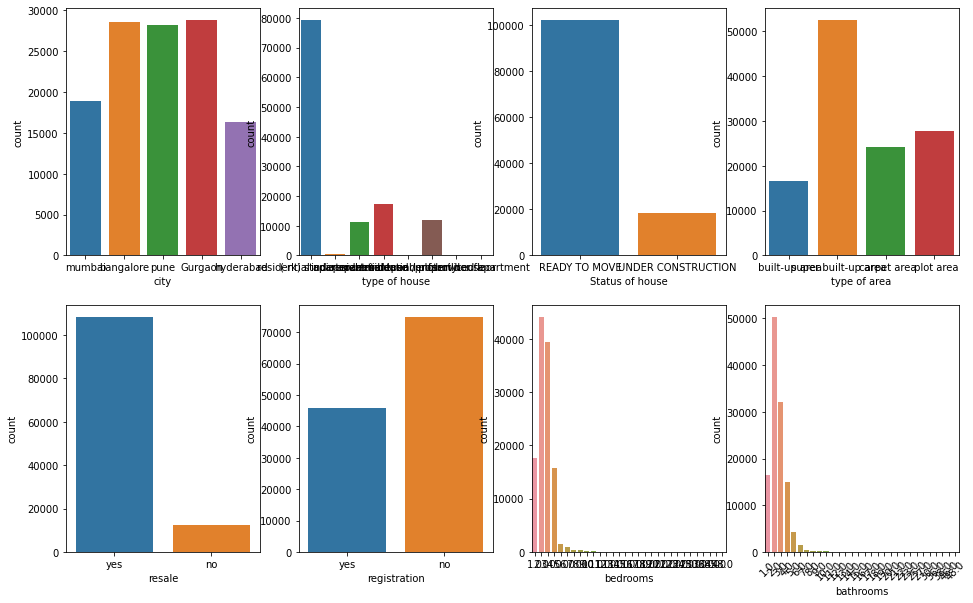

In [59]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('city',data=df_1,ax=axes[0,0])
sns.countplot('type of house',data=df_1,ax=axes[0,1])
sns.countplot('Status of house',data=df_1,ax=axes[0,2])
sns.countplot('type of area',data=df_1,ax=axes[0,3])
sns.countplot('resale',data=df_1,ax=axes[1,0])
sns.countplot('registration',data=df_1,ax=axes[1,1])
sns.countplot('bedrooms',data=df_1,ax=axes[1,2])
sns.countplot('bathrooms',data=df_1,ax=axes[1,3])
plt.xticks(rotation=45)
plt.show()

In [ ]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('city')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('type of house')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Status of house')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('type of area')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('resale')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
train.groupby('registration')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('bedrooms')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
train.groupby('bathrooms')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('area_sq.ft')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

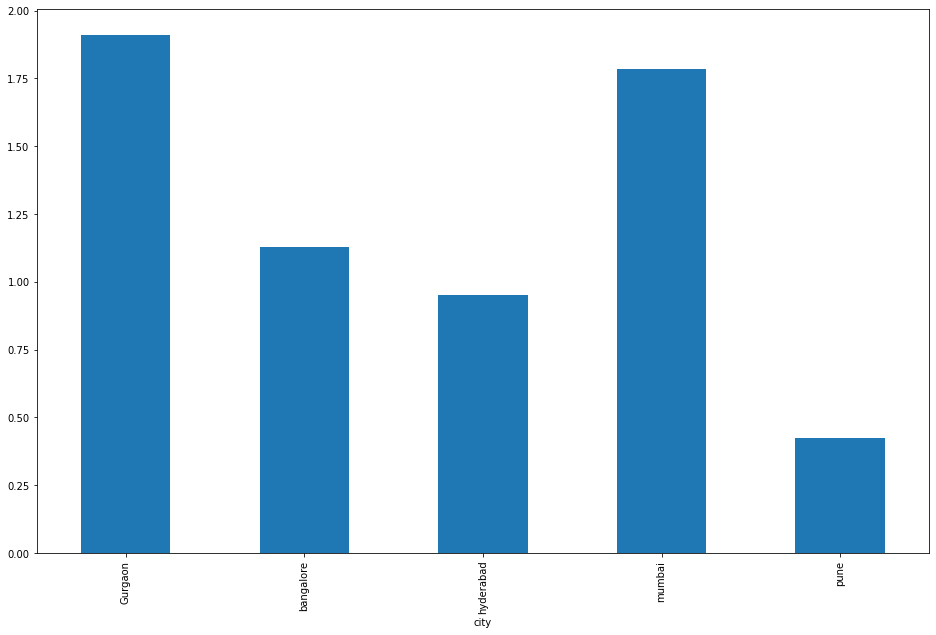

In [ ]:
figbi, axesbi = plt.subplots(1, 1, figsize=(16, 10))
df_1.groupby('city')['price'].mean().plot(kind='bar')

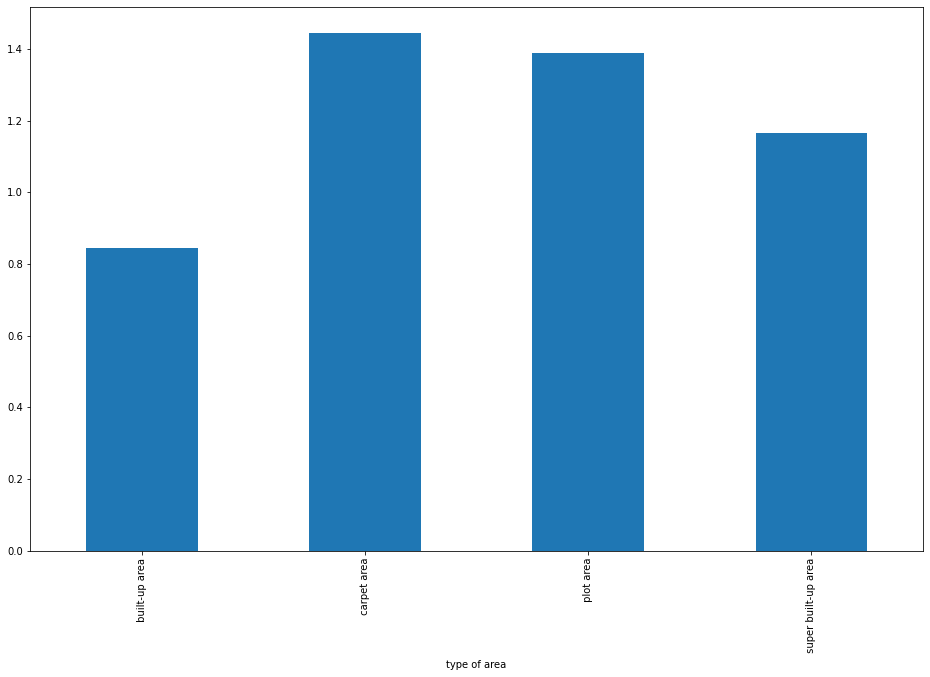

In [ ]:
figbi, axesbi = plt.subplots(1, 1, figsize=(16, 10))
df_1.groupby('type of area')['price'].mean().plot(kind='bar')

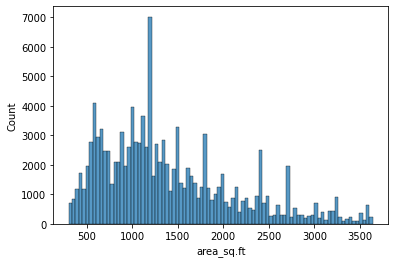

In [ ]:
sns.histplot(df_1['area_sq.ft'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


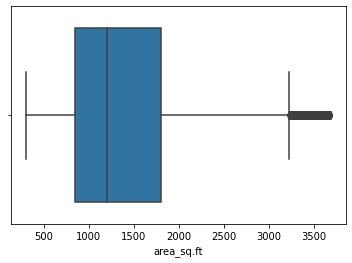

In [ ]:
sns.boxplot(df_1['area_sq.ft'])

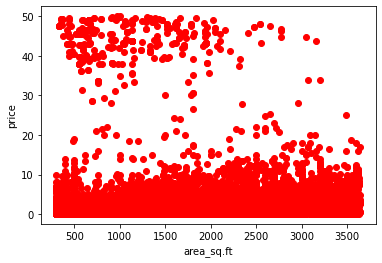

In [64]:
plt.xlabel('area_sq.ft')
plt.ylabel('price')
plt.scatter(df_1['area_sq.ft'],df_1['price'],color = 'red')
plt.show()

In [ ]:
dum =pd.get_dummies(df_1['city'])
dum_df = pd.concat([dum,df_1],axis=1)
dum_df = dum_df.drop('mumbai',axis =1)
dum_df = dum_df.drop('city',axis =1)

In [ ]:
dum_df

,Gurgaon,bangalore,hyderabad,pune,location,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,0,0,0,0,manpada,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,2600.0,4.000
1,0,0,0,0,vinay nagar,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,981.0,0.900
2,0,0,0,0,pokhran-2,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,1268.0,3.120
3,0,0,0,0,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,503.5,0.980
4,0,0,0,0,vikhroli (east),residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,397.5,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120886,0,0,1,0,nizampet,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1550.0,0.850
120887,0,0,1,0,prakash nagar,independent house,READY TO MOVE,plot area,yes,no,8.0,9.0,1215.0,0.985
120888,0,0,1,0,9th phase kphb,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,1700.0,2.400
120889,0,0,1,0,manikonda,residential apartment,READY TO MOVE,carpet area,yes,no,2.0,2.0,1310.0,0.650


In [ ]:
dum =pd.get_dummies(df_1['type of house'])
dum_df = pd.concat([dum,dum_df],axis=1)
dum_df = dum_df.drop('residential apartment',axis =1)
dum_df = dum_df.drop('type of house',axis =1)

In [ ]:
dum_df.head()

,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,location,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,0,0,0,0,0,0,0,0,0,0,0,manpada,READY TO MOVE,built-up area,yes,yes,4.0,4.0,2600.0,4.000
1,0,0,0,0,0,0,0,0,0,0,0,vinay nagar,READY TO MOVE,super built-up area,yes,no,2.0,2.0,981.0,0.900
2,0,0,0,0,0,0,0,0,0,0,0,pokhran-2,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,1268.0,3.120
3,0,0,0,0,0,0,0,0,0,0,0,vikhroli (east),UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,503.5,0.980
4,0,0,0,0,0,0,0,0,0,0,0,vikhroli (east),UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,397.5,0.735


In [ ]:
dum =pd.get_dummies(df_1['Status of house'])
dum_df = pd.concat([dum,dum_df],axis=1)
dum_df = dum_df.drop('UNDER CONSTRUCTION',axis =1)
dum_df = dum_df.drop('Status of house',axis =1)

In [ ]:
dum_df.head(2)

,READY TO MOVE,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,location,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,1,0,0,0,0,0,0,0,0,0,0,0,manpada,built-up area,yes,yes,4.0,4.0,2600.0,4.0
1,1,0,0,0,0,0,0,0,0,0,0,0,vinay nagar,super built-up area,yes,no,2.0,2.0,981.0,0.9


In [ ]:
dum =pd.get_dummies(df_1['type of area'])
dum_df = pd.concat([dum,dum_df],axis=1)
dum_df = dum_df.drop(' built-up area',axis =1)
dum_df = dum_df.drop('type of area',axis =1)

In [ ]:
dum_df.head(2)

,carpet area,plot area,super built-up area,READY TO MOVE,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,location,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,manpada,yes,yes,4.0,4.0,2600.0,4.0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,vinay nagar,yes,no,2.0,2.0,981.0,0.9


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
dum_df['resale'] = le.fit_transform(dum_df['resale'])

In [ ]:
dum_df['registration'] = le.fit_transform(dum_df['registration'])

In [ ]:
dum_df

,carpet area,plot area,super built-up area,READY TO MOVE,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,location,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,manpada,1,1,4.0,4.0,2600.0,4.000
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,vinay nagar,1,0,2.0,2.0,981.0,0.900
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pokhran-2,0,1,3.0,3.0,1268.0,3.120
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,vikhroli (east),0,1,2.0,2.0,503.5,0.980
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,vikhroli (east),0,1,1.0,1.0,397.5,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120886,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,nizampet,1,0,3.0,3.0,1550.0,0.850
120887,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,prakash nagar,1,0,8.0,9.0,1215.0,0.985
120888,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,9th phase kphb,1,0,3.0,3.0,1700.0,2.400
120889,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,manikonda,1,0,2.0,2.0,1310.0,0.650


In [ ]:
dum_df.drop('location',axis=1,inplace = True)

In [ ]:
dum_df.shape

(120891, 21)

In [ ]:
dum_df.isnull().sum()

 carpet area                 0
 plot area                   0
 super built-up area         0
READY TO MOVE                0
( rk) studio apartment       0
farm house                   0
independent builder floor    0
independent house            0
residential land / plot      0
residential property         0
serviced apartment           0
Gurgaon                      0
bangalore                    0
hyderabad                    0
pune                         0
resale                       0
registration                 0
bedrooms                     0
bathrooms                    0
area_sq.ft                   0
price                        0
dtype: int64

In [ ]:
X = dum_df.drop('price',axis = 1)

In [ ]:
X.head()

,carpet area,plot area,super built-up area,READY TO MOVE,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,resale,registration,bedrooms,bathrooms,area_sq.ft
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.0,4.0,2600.0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2.0,2.0,981.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,3.0,1268.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,2.0,503.5
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,397.5


In [ ]:
X.shape

(120891, 20)

In [ ]:
y = dum_df['price']

In [ ]:
y.head()

0    4.000
1    0.900
2    3.120
3    0.980
4    0.735
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.25)

In [ ]:
dt = DecisionTreeRegressor(max_depth=21)

In [ ]:
dt.fit(Xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=21,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dt.predict(Xtest)

array([0.58770656, 0.88362353, 0.475     , ..., 0.0282    , 0.98      ,
       1.6       ])

In [ ]:
ytest

104915    0.6125
106489    1.1500
110194    2.0000
98735     1.6900
72110     0.0140
           ...  
22985     0.2813
116044    1.4500
49357     0.0305
5622      0.3900
120489    0.1200
Name: price, Length: 30223, dtype: float64

In [ ]:
dt.score(Xtest,ytest)

0.21059371108935032

In [ ]:
dum_df

,carpet area,plot area,super built-up area,READY TO MOVE,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.0,4.0,2600.0,4.000
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2.0,2.0,981.0,0.900
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,3.0,1268.0,3.120
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,2.0,503.5,0.980
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,397.5,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120886,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,3.0,3.0,1550.0,0.850
120887,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,8.0,9.0,1215.0,0.985
120888,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,3.0,3.0,1700.0,2.400
120889,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,2.0,2.0,1310.0,0.650


In [ ]:
dum_df['price'].max()

50.0

In [ ]:
dum_df['price'].min()

0.012

In [ ]:
df_log = dum_df

In [ ]:
df_log.shape

(120891, 21)

In [ ]:
df_log['area_sq.ft'] = np.log(dum_df['area_sq.ft'])

In [ ]:
df_log.isnull().sum()

 carpet area                 0
 plot area                   0
 super built-up area         0
READY TO MOVE                0
( rk) studio apartment       0
farm house                   0
independent builder floor    0
independent house            0
residential land / plot      0
residential property         0
serviced apartment           0
Gurgaon                      0
bangalore                    0
hyderabad                    0
pune                         0
resale                       0
registration                 0
bedrooms                     0
bathrooms                    0
area_sq.ft                   0
price                        0
dtype: int64

In [ ]:
df_log['area_sq.ft'] 

0         7.863267
1         6.888572
2         7.145196
3         6.221584
4         5.985195
            ...   
120886    7.346010
120887    7.102499
120888    7.438384
120889    7.177782
120890    7.784473
Name: area_sq.ft, Length: 120891, dtype: float64

In [ ]:
df_log['price'] = np.log(dum_df['price'])

In [ ]:
df_log

,carpet area,plot area,super built-up area,READY TO MOVE,( rk) studio apartment,farm house,independent builder floor,independent house,residential land / plot,residential property,serviced apartment,Gurgaon,bangalore,hyderabad,pune,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.0,4.0,7.863267,1.386294
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2.0,2.0,6.888572,-0.105361
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,3.0,7.145196,1.137833
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,2.0,6.221584,-0.020203
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,5.985195,-0.307885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120886,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,3.0,3.0,7.346010,-0.162519
120887,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,8.0,9.0,7.102499,-0.015114
120888,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,3.0,3.0,7.438384,0.875469
120889,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,2.0,2.0,7.177782,-0.430783


In [ ]:
X = df_log.drop('price',axis =1)

In [ ]:
X.shape

(120891, 20)

In [ ]:
y = df_log['price']

In [ ]:
y.head()

0    1.386294
1   -0.105361
2    1.137833
3   -0.020203
4   -0.307885
Name: price, dtype: float64

In [ ]:
y.shape

(120891,)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_1['area_sq.ft']

0         2600.0
1          981.0
2         1268.0
3          503.5
4          397.5
           ...  
120886    1550.0
120887    1215.0
120888    1700.0
120889    1310.0
120890    2403.0
Name: area_sq.ft, Length: 120891, dtype: float64

In [ ]:
df_1['area_sq.ft'].max()

3681.0

In [ ]:
dum_df['area_sq.ft'].max()

8.210939733379021

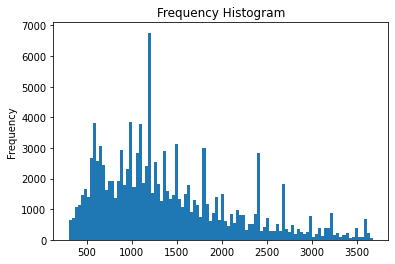

In [ ]:
x = df_1['area_sq.ft']
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

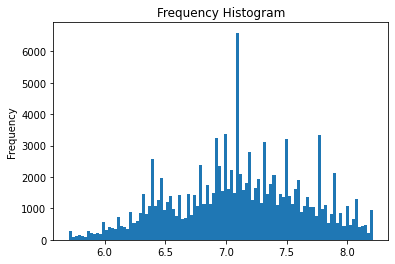

In [ ]:
x = df_log['area_sq.ft']
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
df_log['area_sq.ft'].max()

8.210939733379021

In [ ]:
df_log.skew()

 carpet area                  1.503526
 plot area                    1.286016
 super built-up area          0.265882
READY TO MOVE                -1.926745
( rk) studio apartment       13.433395
farm house                   55.649316
independent builder floor     2.702717
independent house             2.821936
residential land / plot       2.018123
residential property         21.050071
serviced apartment           32.518834
Gurgaon                       1.226301
bangalore                     1.241221
hyderabad                     2.131733
pune                          1.259894
resale                       -2.617950
registration                  0.497989
bedrooms                      4.087676
bathrooms                     3.657522
area_sq.ft                   -0.142707
price                        -0.891523
dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# DECISION TREE

In [ ]:
dt2 = DecisionTreeRegressor()

In [ ]:
dt2.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dt2.predict(X_test)

array([-0.99425227, -1.09641711,  0.19271752, ..., -0.03964238,
        0.61900985, -0.35667494])

In [ ]:

dt2.score(X_test,y_test)

0.599726558667405

# XGBOOST

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg = XGBRegressor()

In [ ]:
xg.fit(X_train,y_train)

[05:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xg.predict(X_test)

array([-0.96596766, -1.0311003 ,  0.3635497 , ...,  0.10613513,
        1.0690862 , -0.23069811], dtype=float32)

In [ ]:
xg.score(X_test,y_test)

0.6242727724647957

In [ ]:
xg.score(X_train,y_train)

0.6317890143655729

# linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_reg.score(X_test,y_test)

0.35336136155542863

## Random forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200,random_state=1)
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
forest.score(X_train,y_train)

0.8290315552326102

In [ ]:
forest.score(X_test,y_test)

0.6651987765268621

## GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_m = GradientBoostingRegressor(n_estimators=247, max_depth=6, learning_rate=0.3)
gb_m.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=247,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_m.score(X_train,y_train)

0.7532894640502439

In [ ]:
gb_m.score(X_test,y_test)

0.6825592643126773

In [ ]:
##n_estimators=247, max_depth=6, learning_rate=0.3

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
s = SVR()

In [ ]:
s.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
s.score(X_train,y_train)

0.5497497062965329

In [ ]:
s.score(X_test,y_test)

0.5478314881879984

## ADA BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
abr = AdaBoostRegressor()

In [ ]:
abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
abr.predict(X_test)

array([-1.12251749, -0.40775016,  0.22565994, ..., -0.17472064,
        0.5087843 , -0.40775016])

In [ ]:
abr.score(X_test,y_test)

0.3321427282111503

In [ ]:
abr.score(X_train,y_train)

0.33271649264170045

##RANDOM FOREST Hyper Parameter Tuning

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': [5,10,15,20], 'max_features': ['auto', 'log2'], 'n_estimators': [100,300,500,700]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr = RandomForestRegressor(random_state = 1)

In [ ]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
g_search.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 700}

In [ ]:
g_search.score(X_test,y_test)

0.6827019673170358

In [ ]:
g_search.score(X_train,y_train)

0.7477207668538697

## Decision Tree Hyper Parameter Tuning

In [ ]:
param_grid = {'splitter':['best'], 'max_depth':[5,10,15,20,25,30,35], 'min_samples_split':[2], 'min_samples_leaf':[9,12,15,18,21,14]}

In [ ]:
dt4 = DecisionTreeRegressor(random_state= 1)

In [ ]:
g_search = GridSearchCV(estimator = dt4, param_grid = param_grid, cv = 3, n_jobs = 1,verbose=1, return_train_score=True)

In [ ]:
g_search.fit(X_train,y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:   23.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 14],
                         'min_samples_split': [2], 'splitter': ['best

In [ ]:
g_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
g_search.score(X_train,y_train)

0.7174415764544385

In [ ]:
g_search.score(X_test,y_test)

0.6675310410374707

# Gradient Boosting Hyper Parameter Tuning

In [ ]:
param_grid = {
 'n_estimators': [100],
 'learning_rate' : [0.05,0.1],
 'max_depth' : [10]
 }

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gr_s = GridSearchCV(gbr, param_grid = param_grid, cv=3, n_jobs=-1,verbose=1)

In [ ]:
gr_s.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
gr_s.score(X_train,y_train)

0.7645409729898305

In [ ]:
gr_s.score(X_test,y_test)

0.6828887641886693

In [ ]:
gr_s.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

# CAT BOOSTING

In [ ]:
df_1.head()

NameError: ignored

In [ ]:
df_1.isnull().sum()

city               0
location           0
type of house      0
Status of house    0
type of area       0
resale             0
registration       0
bedrooms           0
bathrooms          0
area_sq.ft         0
price              0
dtype: int64

In [ ]:
df_1.drop('location',axis =1,inplace = True)

In [ ]:
df_1.head()

,city,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,mumbai,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,2600.0,4.000
1,mumbai,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,981.0,0.900
2,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,1268.0,3.120
3,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,503.5,0.980
4,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,397.5,0.735


In [ ]:
df_1['area_sq.ft'] = np.log(df_1['area_sq.ft'])

In [ ]:
df_1['price'] = np.log(df_1['price'])

In [ ]:
df_1

,city,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,mumbai,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,7.863267,1.386294
1,mumbai,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,6.888572,-0.105361
2,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,7.145196,1.137833
3,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,6.221584,-0.020203
4,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,5.985195,-0.307885
...,...,...,...,...,...,...,...,...,...,...
120886,hyderabad,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,7.346010,-0.162519
120887,hyderabad,independent house,READY TO MOVE,plot area,yes,no,8.0,9.0,7.102499,-0.015114
120888,hyderabad,residential apartment,READY TO MOVE,super built-up area,yes,no,3.0,3.0,7.438384,0.875469
120889,hyderabad,residential apartment,READY TO MOVE,carpet area,yes,no,2.0,2.0,7.177782,-0.430783


In [ ]:
X_c = df_1.drop('price',axis =1)

In [ ]:
y_c = df_1['price']

In [ ]:
Xc_train,Xc_test,yc_train,yc_test = train_test_split(X_c,y_c,test_size = 0.2)

In [ ]:
df_1.columns

Index(['city', 'type of house', 'Status of house', 'type of area', 'resale',
       'registration', 'bedrooms', 'bathrooms', 'area_sq.ft', 'price'],
      dtype='object')

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cb = CatBoostRegressor(cat_features=['city', 'type of house', 'Status of house', 'type of area', 'resale','registration'])

In [ ]:
cb.fit(Xc_train,yc_train)

In [ ]:
cb.predict(Xc_test)

array([-0.21827542,  0.58321103, -0.72597889, ...,  1.17190495,
       -0.86771886,  0.62988422])

In [ ]:
cb.score(Xc_train,yc_train)

0.6915507622109061

In [ ]:
cb.score(Xc_test,yc_test)

0.6843332919516341

In [ ]:
cb.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.08806800097227097,
 'loss_function': 'RMSE',
 'max_ctr_complexity': 4,
 'max_leaves': 64,
 'min_da

In [ ]:
model = CatBoostRegressor()

grid = {'learning_rate': [0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

In [ ]:
model = CatBoostRegressor(cat_features=['city', 'type of house', 'Status of house', 'type of area', 'resale','registration'])

grid = {'learning_rate': [0.1, 0.2,0.3],
        'depth': [10, 12, 14],
        #'l2_leaf_reg': [1, 3, 5, 7, 9]
        }

grid_search_result = model.grid_search(grid, 
                                       X=Xc_train, 
                                       y=yc_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
21:	learn: 0.6324992	test: 0.6392635	best: 0.6392635 (21)	total: 3.59s	remaining: 2m 39s
22:	learn: 0.6321401	test: 0.6391137	best: 0.6391137 (22)	total: 3.73s	remaining: 2m 38s
23:	learn: 0.6314264	test: 0.6388259	best: 0.6388259 (23)	total: 3.89s	remaining: 2m 38s
24:	learn: 0.6314261	test: 0.6388229	best: 0.6388229 (24)	total: 3.91s	remaining: 2m 32s
25:	learn: 0.6302897	test: 0.6383222	best: 0.6383222 (25)	total: 4.13s	remaining: 2m 34s
26:	learn: 0.6291618	test: 0.6376253	best: 0.6376253 (26)	total: 4.3s	remaining: 2m 34s
27:	learn: 0.6291473	test: 0.6376090	best: 0.6376090 (27)	total: 4.36s	remaining: 2m 31s
28:	learn: 0.6291400	test: 0.6376116	best: 0.6376090 (27)	total: 4.38s	remaining: 2m 26s
29:	learn: 0.6281574	test: 0.6372839	best: 0.6372839 (29)	total: 4.52s	remaining: 2m 26s
30:	learn: 0.6271422	test: 0.6368024	best: 0.6368024 (30)	total: 4.69s	remaining: 2m 26s
31:	learn: 0.6269325	test: 0.6366708	best: 0.6366708 (31)	to

In [ ]:
grid_search_result['params']


{'depth': 12, 'learning_rate': 0.1}

In [ ]:
model = CatBoostRegressor(cat_features=['city', 'type of house', 'Status of house', 'type of area', 'resale','registration'],depth= 11, l2_leaf_reg= 1, learning_rate= 0.1)

In [ ]:
model.fit(Xc_train,yc_train)

0:	learn: 1.0542357	total: 165ms	remaining: 2m 45s
1:	learn: 0.9974694	total: 324ms	remaining: 2m 41s
2:	learn: 0.9479630	total: 489ms	remaining: 2m 42s
3:	learn: 0.9056385	total: 638ms	remaining: 2m 38s
4:	learn: 0.8688398	total: 785ms	remaining: 2m 36s
5:	learn: 0.8376847	total: 927ms	remaining: 2m 33s
6:	learn: 0.8107502	total: 1.07s	remaining: 2m 32s
7:	learn: 0.7884010	total: 1.25s	remaining: 2m 35s
8:	learn: 0.7681218	total: 1.39s	remaining: 2m 32s
9:	learn: 0.7514667	total: 1.54s	remaining: 2m 32s
10:	learn: 0.7375939	total: 1.7s	remaining: 2m 32s
11:	learn: 0.7252100	total: 1.83s	remaining: 2m 30s
12:	learn: 0.7152235	total: 2s	remaining: 2m 31s
13:	learn: 0.7065256	total: 2.14s	remaining: 2m 31s
14:	learn: 0.6988210	total: 2.31s	remaining: 2m 31s
15:	learn: 0.6925877	total: 2.45s	remaining: 2m 30s
16:	learn: 0.6867743	total: 2.58s	remaining: 2m 29s
17:	learn: 0.6818154	total: 2.72s	remaining: 2m 28s
18:	learn: 0.6774927	total: 2.87s	remaining: 2m 27s
19:	learn: 0.6731241	total

In [ ]:
model.score(Xc_test,yc_test)

0.6912390486422142

In [ ]:
model.score(Xc_train,yc_train)

0.7332074408785869

## dumping model into pickle

In [ ]:
import pickle

In [ ]:
filename = 'finalized_house_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
df_1.he

,city,type of house,Status of house,type of area,resale,registration,bedrooms,bathrooms,area_sq.ft,price
0,mumbai,residential apartment,READY TO MOVE,built-up area,yes,yes,4.0,4.0,7.863267,1.386294
1,mumbai,residential apartment,READY TO MOVE,super built-up area,yes,no,2.0,2.0,6.888572,-0.105361
2,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,3.0,3.0,7.145196,1.137833
3,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,2.0,2.0,6.221584,-0.020203
4,mumbai,residential apartment,UNDER CONSTRUCTION,carpet area,no,yes,1.0,1.0,5.985195,-0.307885


In [ ]:
for i in df_1.columns:
  print(df_1[i].unique())

['mumbai' 'bangalore' 'pune' 'Gurgaon' 'hyderabad']
['residential apartment' '( rk) studio apartment' 'independent house'
 'residential land / plot' 'residential property'
 'independent builder floor' 'farm house' 'serviced apartment']
['READY TO MOVE' 'UNDER CONSTRUCTION']
[' built-up area' ' super built-up area' ' carpet area' ' plot area']
['yes' 'no']
['yes' 'no']
[ 4.  2.  3.  1.  6.  7.  5.  8. 11. 10.  9. 13. 15. 45. 12. 22. 20. 48.
 17. 16. 14. 38. 18. 30. 19. 21. 25. 23. 24. 36.]
[ 4.  2.  3.  1.  5.  6.  7.  8. 11. 17. 12. 10. 13.  9. 15. 46. 22. 14.
 48. 16. 19. 38. 18. 30. 20. 36. 27. 25. 21. 23.]
[7.86326672 6.88857246 7.14519613 ... 8.17849849 7.69530313 8.15679705]
[ 1.38629436 -0.10536052  1.137833   ...  0.31115443 -2.27594316
 -0.37716924]


In [ ]:
Xc_test.loc[36470].values

array(['bangalore', 'residential apartment', 'READY TO MOVE',
       ' super built-up area', 'yes', 'no', 2.0, 2.0, 7.237059026124737],
      dtype=object)

In [ ]:
model.predict(['bangalore', 'residential apartment', 'READY TO MOVE',
       ' super built-up area', 'yes', 'no', 2.0, 2.0, 7.237059026124737])

-0.18170633704266664

In [ ]:
np.exp(7.237059026124737)

1390.0

In [ ]:
np.exp(-0.18170633704266664)

0.8338461741981457

In [ ]:
pic_mod = pickle.load(open('finalized_house_model.sav','rb'))

In [ ]:
pic_mod.predict(['bangalore', 'residential apartment', 'READY TO MOVE',
       ' super built-up area', 'yes', 'no', 2, 2, 7.237059026124737])

-0.18170633704266664